# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (changed to resources/city_data.csv, ride_data.csv)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          120 non-null    object
 1   driver_count  120 non-null    int64 
 2   type          120 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.9+ KB


### Merge the DataFrames

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [8]:
#  1. Get the total rides for each city type
ride_numbers_ds = pyber_data_df.groupby(pyber_data_df['type']).ride_id.count()

ride_numbers_ds

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [9]:
# 2. Get the total drivers for each city type
drivers_numbers_ds = city_data_df.groupby(city_data_df['type']).sum()['driver_count']

drivers_numbers_ds

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [10]:
#  3. Get the total amount of fares for each city type
fares_numbers_ds = pyber_data_df.groupby(pyber_data_df['type']).fare.sum()

fares_numbers_ds

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [12]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride = fares_numbers_ds/ride_numbers_ds

avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [13]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver = fares_numbers_ds/drivers_numbers_ds

avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [14]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({'Total Rides':ride_numbers_ds.map('{:,.0f}'.format),
            'Total Drivers':drivers_numbers_ds.map('{:,.0f}'.format),
            'Total Fares':fares_numbers_ds.map('${:,.2f}'.format),
            'Average Fare per Ride':avg_fare_per_ride.map('${:,.2f}'.format),
            'Average Fare per Driver':avg_fare_per_driver.map('${:,.2f}'.format)})

In [15]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [19]:
#  8. Format the columns.
newname_pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date',
                    'fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 
                    'type':'City Type'} )
newname_pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [21]:
# 1. Read the merged DataFrame
DateAsIndex_newname_pyber_data_df = newname_pyber_data_df.set_index('Date')
fare_pyber_data_df = DateAsIndex_newname_pyber_data_df.copy().drop(columns = ['Ride Id','City','No. Drivers'])

fare_pyber_data_df

,Fare,City Type
Date,,
2019-01-14 10:14:22,13.83,Urban
2019-03-04 18:24:09,30.24,Urban
2019-02-24 04:29:00,33.44,Urban
2019-02-10 23:22:03,23.44,Urban
2019-03-06 04:28:35,34.58,Urban
...,...,...
2019-04-29 17:04:39,13.38,Rural
2019-01-30 00:05:47,20.76,Rural
2019-02-10 21:03:50,11.11,Rural


In [22]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
fare_pyber_data_df_new_index = fare_pyber_data_df.index.astype('datetime64[ns]')
fare_pyber_data_df.index = pd.Index(fare_pyber_data_df_new_index)

fare_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fare       2375 non-null   float64
 1   City Type  2375 non-null   object 
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [24]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()

# Summarize total fares by the type of city and date to gather data for new DataFrame
sum_fare_pyber_data_df = fare_pyber_data_df.groupby(by = ['Date','City Type']).sum()
# reset index after sum is found
reset_sum_fare_pyber_data_df = sum_fare_pyber_data_df.reset_index()

reset_sum_fare_pyber_data_df

,Date,City Type,Fare
0,2019-01-01 00:08:16,Urban,37.91
1,2019-01-01 00:46:46,Suburban,47.74
2,2019-01-01 02:07:24,Suburban,24.07
3,2019-01-01 03:46:50,Urban,7.57
4,2019-01-01 05:23:21,Urban,10.75
...,...,...,...
2370,2019-05-08 04:20:00,Urban,21.99
2371,2019-05-08 04:39:49,Urban,18.45
2372,2019-05-08 07:29:01,Urban,18.55
2373,2019-05-08 11:38:35,Urban,19.77


In [28]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
totalfare_pivot_df = pd.pivot_table(reset_sum_fare_pyber_data_df, index = 'Date', values = 'Fare', columns='City Type')

totalfare_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [36]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
April_totalfare_pivot_df = TotalFare_pivot_df.loc['2019-01-01':'2019-04-29']

April_totalfare_pivot_df.tail()

City Type,Rural,Suburban,Urban
Date,,,
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN
2019-04-29 23:05:04,NaN,NaN,14.59
2019-04-29 23:10:18,NaN,29.39,NaN


In [37]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

weekly_April_totalfare_pivot_df = April_totalfare_pivot_df.resample('W-MON').sum()
weekly_April_totalfare_pivot_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-07,187.92,876.61,1879.70
2019-01-14,139.80,1080.40,2193.36
2019-01-21,233.85,1163.93,2105.90
2019-01-28,210.94,1285.13,1846.98
2019-02-04,361.50,1079.58,2085.77
2019-02-11,81.91,879.92,2200.85
2019-02-18,140.52,1394.86,2389.68
2019-02-25,448.07,1067.99,2156.88
2019-03-04,75.65,836.61,2619.82


In [38]:
# 7. Check that the datatype for the index is datetime using df.info()
weekly_April_totalfare_pivot_df.info

<bound method DataFrame.info of City Type    Rural  Suburban    Urban
Date                                 
2019-01-07  187.92    876.61  1879.70
2019-01-14  139.80   1080.40  2193.36
2019-01-21  233.85   1163.93  2105.90
2019-01-28  210.94   1285.13  1846.98
2019-02-04  361.50   1079.58  2085.77
2019-02-11   81.91    879.92  2200.85
2019-02-18  140.52   1394.86  2389.68
2019-02-25  448.07   1067.99  2156.88
2019-03-04   75.65    836.61  2619.82
2019-03-11  353.76    842.28  2240.19
2019-03-18  187.63   1096.89  1971.72
2019-03-25  126.07   1029.66  2495.15
2019-04-01  292.06   1061.82  1970.03
2019-04-08  453.42   1034.28  2101.04
2019-04-15  214.60    821.52  2579.51
2019-04-22  271.87   1144.27  2329.98
2019-04-29  201.72   1355.51  2241.85>

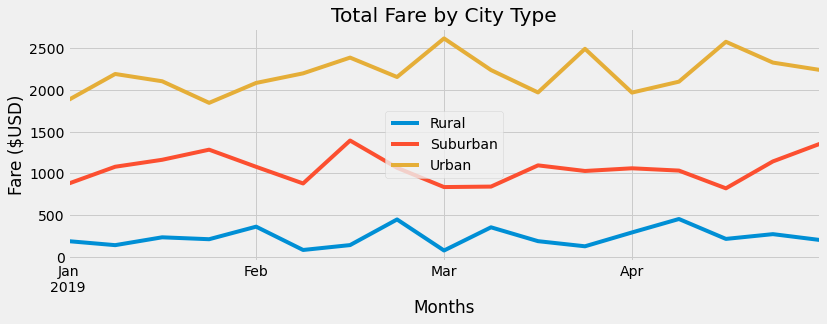

In [40]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(12,4))
weekly_April_totalfare_pivot_df.plot(ax = ax)

ax.set_title('Total Fare by City Type')
ax.set_xlabel('Months')
ax.set_ylabel('Fare ($USD)')

ax.legend(loc='center')
plt.savefig('analysis/Challenge_Fig.png')
plt.show()
